# Simulation of leapfrogging vortices 

This document is used for debugging and playing around. Please grade the `animation.py` file.

In [124]:
import numpy as np
import matplotlib.pyplot as plt

dt = 1 # Adjust this
Nsteps = 5 # Adjust this

plt.rcParams.update({'font.size': 22})

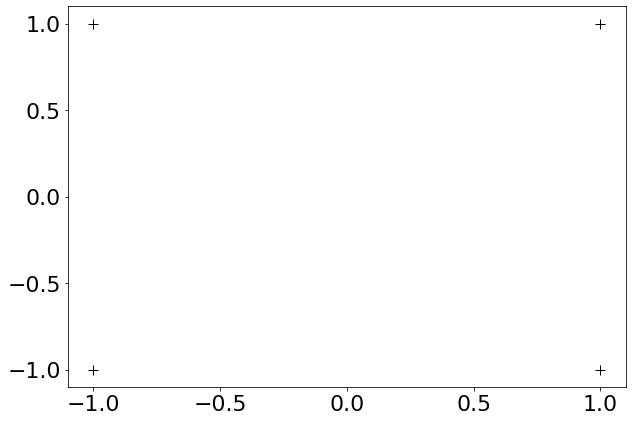

In [99]:
## Setting up initial conditions
# Vortex rings

y_v = np.array([-1,1,-1,1]) # y positions of vortices
x_v = np.array([-1,-1,1,1]) # x positions of vortices
k_v = np.array(1) # Line vortex constant

# Set orientations of vortices: +1 is out of the page, -1 is into the page
orientations = np.array([1, -1, 1, -1])

# Set up the plot
plt.ion()
fig, ax = plt.subplots( 1 , 1 )

fig.set_size_inches(10, 7)

# Mark initial positions of vortices
p = ax.plot(x_v, y_v, "k+", markersize=10)

In [81]:
# draw initial velocity streamline
ngrid = 5
res = 360j
increment = (2*ngrid)/res.imag # step size of velocity grid
Y, X = np.mgrid[-ngrid:ngrid:res , -ngrid:ngrid:res]

# Velocities
vel_x = np.zeros(np.shape(Y))
vel_y = np.zeros(np.shape(X))

# masking radius
r_mask = 0.5 # Adjust this
# we won't plot streamlines within this radius to see movement more clearly


for i in range(len(x_v)):
    print("vortex " + str(i))
    # Get position of this vortex
    vortex_position = np.array([x_v[i], y_v[i]])
    r_vortex = np.sqrt(np.sum(vortex_position**2)) # distance between vortex and origin 
    print(r_vortex)
    
    # Get distance between all points and vortex
    r = np.sqrt((X-x_v[i])**2 + (Y-y_v[i])**2)
    r[r<r_mask] = np.nan # Mask values within radius r_mask
    
    ## Compute speeds
    u_phi = k_v/r * orientations[i] # azimuthal velocity
    
    ## decompose velocity into x and y components
    # find angles of velocities w.r.t. the x-axis
    delta_x = X-x_v[i]
    alpha = np.arccos(delta_x/r)
    gamma = np.pi/2 + alpha # this is the angle between u_phi and the x-axis
    
    # get x and y components of velocity for this vortex
    u_x = u_phi*np.cos(gamma)
    u_y = u_phi*np.sin(gamma)
    
    # add the velocity to the combined array
    vel_x += u_x
    vel_y += u_y

vortex 0
1.4142135623730951
vortex 1
1.4142135623730951
vortex 2
1.4142135623730951
vortex 3
1.4142135623730951


In [112]:
def calculate_velocity(vortex_x, vortex_y, x, y, r_mask=0, orientation=1):
    """
    This function calculates the x and y components of the velocity due to one line vortex.
    
    Parameters
    ----------
    vortex_x : float or int
        x-position of the vortex
    vortex_y : float or int
        x-position of the vortex
    x : array
        x-positions on the simulation grid as outputted by mgrid
    y : array
        y-positions on the simulation grid as outputted by mgrid
    r_mask : float or int
        radius around the vortex to mask (values of velocity within that radius will be nan)
    orientation : -1 or 1
        the vortex is oriented out of the page (1) or into the page (-1)
    
    """
    # Get position of this vortex
    vortex_position = np.array([vortex_x, vortex_y])
    r_vortex = np.sqrt(np.sum(vortex_position**2)) # distance between vortex and origin 
    
    # Get distance between all points and vortex
    r = np.sqrt((x-vortex_x)**2 + (y-vortex_y)**2)
    r_masked = r.copy()
    r_masked[r<r_mask] = np.nan # Mask values within radius r_mask
    
    ## Compute speeds
    u_phi_no_mask = k_v/r * orientation # azimuthal velocity
    u_phi = k_v/r_masked * orientation
    
    ## decompose velocity into x and y components
    # find angles of velocities w.r.t. the x-axis
    delta_x = x-vortex_x
    alpha = np.arccos(delta_x/r)
    gamma = np.pi/2 + alpha # this is the angle between u_phi and the x-axis
    
    # same but masked version
    alpha_masked = np.arccos(delta_x/r_masked)
    gamma_masked = np.pi/2 + alpha_masked # this is the angle between u_phi and the x-axis
    
    # get x and y components of velocity for this vortex
    u_x = u_phi*np.cos(gamma)
    u_y = u_phi*np.sin(gamma)
    
    u_x_masked = u_phi*np.cos(gamma_masked)
    u_y_masked = u_phi*np.sin(gamma_masked)
    
    return {"vel_x" : u_x_masked,
           "vel_y" : u_y_masked,
           "vel_x_no_mask": u_x,
           "vel_y_no_mask": u_y}

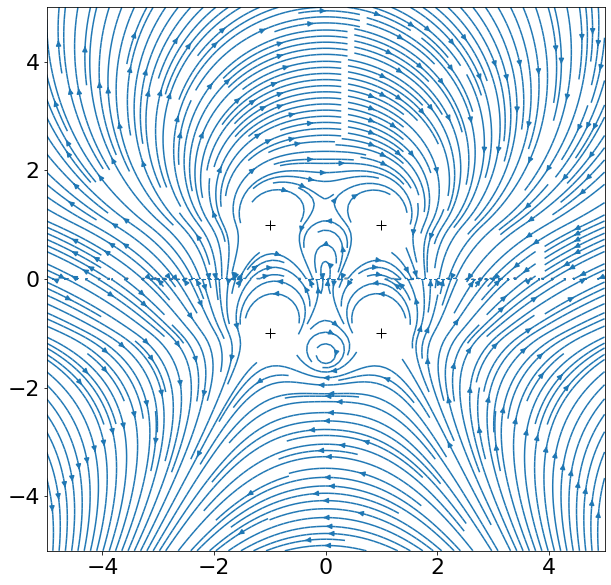

In [116]:
# draw initial velocity streamline
ngrid = 5
res = 360j
increment = (2*ngrid)/res.imag # step size of velocity grid
Y, X = np.mgrid[-ngrid:ngrid:res , -ngrid:ngrid:res]

# Velocities
vel_x = np.zeros(np.shape(Y))
vel_y = np.zeros(np.shape(X))

# masking radius
r_mask = 0.5 # Adjust this
# we won't plot streamlines within this radius to see movement more clearly

for i in range(len(x_v)):
    v = calculate_velocity(x_v[i], y_v[i], X, Y, r_mask = 0.5, orientation=orientations[i])
    vel_x += v["vel_x"]
    vel_y += v["vel_y"]

# Set up the plot
plt.ion()
fig, ax = plt.subplots( 1 , 1 )

fig.set_size_inches(10, 10)

# Mark initial positions of vortices
p, = ax.plot(x_v, y_v, "k+", markersize=10)

# set boundaries of simulation box
ax.set_xlim([-ngrid, ngrid])
ax.set_ylim([-ngrid, ngrid])

# initial streamlines
ax.streamplot(X, Y, vel_x, vel_y, density =[3, 3])
fig.canvas.draw()

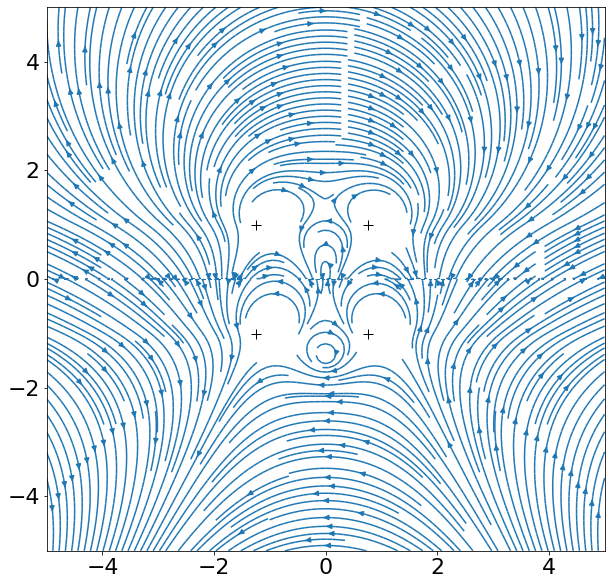

In [131]:
# Set up the plot
plt.ion()
fig, ax = plt.subplots( 1 , 1 )

fig.set_size_inches(10, 10)


def plot_streamlines(x_v, y_v, X, Y, vel_x, vel_y, density =[3, 3]):

    # Mark initial positions of vortices
    p, = ax.plot(x_v, y_v, "k+", markersize=10)

    # set boundaries of simulation box
    ax.set_xlim([-ngrid, ngrid])
    ax.set_ylim([-ngrid, ngrid])

    # initial streamlines
    ax.streamplot(X, Y, vel_x, vel_y, density)
    fig.canvas.draw()

plot_streamlines(x_v, y_v, X, Y, vel_x, vel_y)

[-0.22342098 -0.04060255 -0.04192233 -0.22572227]
here


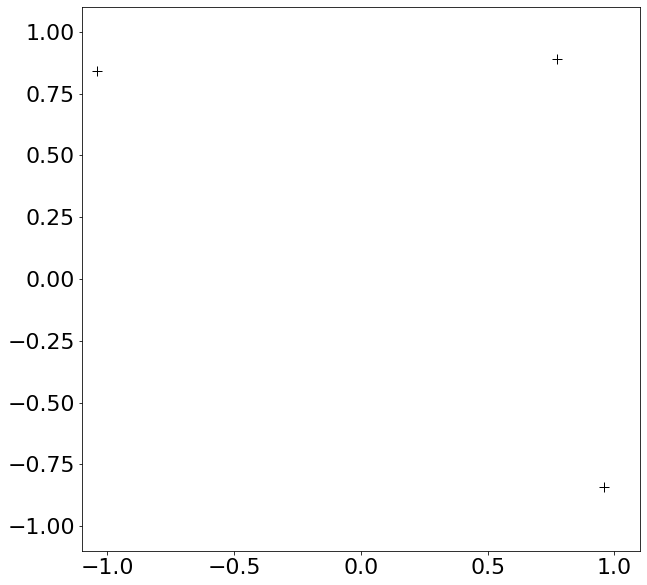

[-0.21523001 -0.04836435 -0.05876062 -0.19640963]
here
[-0.20300005 -0.05686642 -0.07232867 -0.17292991]
here
[-0.18961866 -0.06483911 -0.08226007 -0.15359745]
here
[-0.17467945 -0.07355422 -0.09029867 -0.13742015]
here


In [147]:
## Setting up initial conditions
# Vortex rings

y_v = np.array([-1,1,-1,1], dtype="f") # y positions of vortices
x_v = np.array([-1,-1,1,1], dtype="f") # x positions of vortices
k_v = np.array(1) # Line vortex constant

# Set orientations of vortices: +1 is out of the page, -1 is into the page
orientations = np.array([1, -1, 1, -1])

# Set up the plot
plt.ion()
fig, ax = plt.subplots( 1 , 1 )

fig.set_size_inches(10, 10)

## Evolution

count = 0
while count < Nsteps:
    # initialize velocities
    vel_x = np.zeros(np.shape(Y))
    vel_y = np.zeros(np.shape(X))
    
    # Store velocities at position of the vortices in this
    u_x_v = np.zeros(np.shape(x_v))
    u_y_v = np.zeros(np.shape(y_v))
    
    ## compute and update advection velocity
    for i in range(len(x_v)):
        #print("Main vortex: " + str(i))
        v = calculate_velocity(x_v[i], y_v[i], X, Y, orientation=orientations[i], r_mask=0.5)
        vel_x += v["vel_x"]
        vel_y += v["vel_y"]
        
        
        for k in range(len(x_v)): ## find velocities affecting each vortex
            if k != i:
                x_index = int(x_v[k]/increment)
                y_index = int(y_v[k]/increment)
                
                u_x_v[k] += v["vel_x"][x_index, y_index]
                u_y_v[k] += v["vel_y"][x_index, y_index]
    
    
    print(u_y_v) # these are the same for all vortices but shouldn't be.
    p, = ax.plot(x_v, y_v, "k+", markersize=10)
    p.set_xdata(x_v)
    p.set_ydata(y_v)
    
    # clear screen
    ax.collections = []
    ax.patches = []
    
    print("here")
    #plot_streamlines(x_v, y_v, X, Y, vel_x, vel_y)
    
    # update positions of vortices
    y_v += u_x_v*dt
    x_v += u_y_v*dt
    
    fig.canvas.draw()
    plt.pause(0.001)
    
    count += 1